# Dataset Generation Tools

In this notebook, we generate signals used for our wireless adversarial machine learning tasks.

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

sns.set() # Use seaborn themes.

## Complex Time Series

TensorFlow does not currently accept complex numbers in loss functions. The reason is because complex numbers are not ordered, but real numbers are (see [StackOverflow](https://stackoverflow.com/a/58876622)).

One solution is to convert the I/Q data into magnitude and phase components, which can then be used as input features to the model.

In [32]:
def n2t(
    n: int|tuple[int,int]|np.ndarray[int],
    fs: float,
    ) -> np.ndarray[float]:
    """Convert discrete sample vector to time.

    Args:
        n (int | tuple[int,int] | np.ndarray[int]): Number of samples to simulate, or 2-tuple of discrete sample ranges, or vector of discrete samples.
        fs (float): Sample rate (Hz).

    Returns:
        np.ndarray[float]: Vector of time values (units of seconds).
    """
    if isinstance(n, int): # Discrete sample vector starting from zero.
        n = np.r_[0:n]
    elif isinstance(n, (list,tuple)): # 2-tuple of discrete range indices.
        assert len(n) == 2,'vector slice must be a 2-tuple'
        n = np.r_[n[0]:n[1]]
    return n.astype(float)/fs # Time vector.

def t2n(
    t: float|tuple[float,float]|np.ndarray[float],
    fs: float,
    ) -> np.ndarray[int]:
    """Convert time sample vector to discrete.

    Args:
        t (float | tuple[float,float] | np.ndarray[float]): Length of time vector (starting from zero), or 2-tuple of time ranges, or vector of time samples.
        fs (float): Sample rate (Hz).

    Returns:
        np.ndarray[int]: Vector of discrete sample values.
    """
    if isinstance(t, float): # Discrete sample vector starting from zero.
        t = np.r_[0.:t]
    elif isinstance(t, (list,tuple)): # 2-tuple of discrete range indices.
        assert len(t) == 2,'vector slice must be a 2-tuple'
        t = np.r_[t[0]:t[1]]
    return (t*fs).astype(int)

In [33]:
def wave(
    fc: float|np.ndarray[float],
    t: np.ndarray[float],
    phi: float|np.ndarray[float] = 0.,
    ) -> np.ndarray[np.complex64]:
    """Sinusoid waveform generator from time vector.

    Args:
        fc (float|np.ndarray[float]): Carrier frequency (Hz).
        t (np.ndarray[float]): Vector of time values (seconds).
        phi (float|np.ndarray[float], optional): Signal phase, or vector of phases. Defaults to 0.

    Returns:
        np.ndarray[np.complex64]: Complex sinusoid values.
    """
    if phi is None: # Catch phase being set null.
        phi = 0.
    k = 2.*np.pi*fc*t + phi # Content of Euler's formula.
    x = np.exp(1.j*k) # Complex sinusoid.
    return x

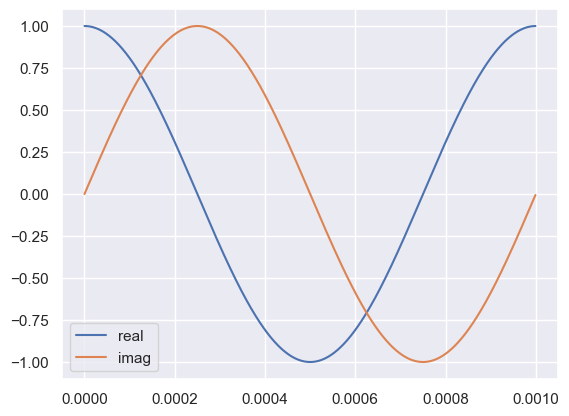

In [35]:
fc = 1e3
fs = 10e5
n_samples = 1000
t = n2t(n=n_samples, fs=fs)
phi = None
x = wave(fc=fc, t=t, phi=phi)

plt.plot(t, np.real(x), label='real')
plt.plot(t, np.imag(x), label='imag')
plt.legend()